# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


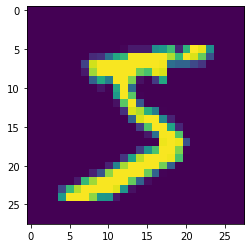

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(128,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,3,3, activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(128,3,3,activation='relu'))


model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 9, 9, 32)          36896     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 5, 5, 128)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.1307 - acc: 0.9604
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0446 - acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0318 - acc: 0.9901
Epoch 4/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0250 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0199 - acc: 0.9938
Epoch 6/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0166 - acc: 0.9948
Epoch 7/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0144 - acc: 0.9952
Epoch 8/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0122 - acc: 0.9961
Epoch 9/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0112 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 12s 195us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)

[0.029554922466222478, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred[:9])
print(y_test[:9])

[[1.01445096e-14 8.37360509e-14 1.93626821e-08 4.29076663e-10
  5.71909739e-18 1.51739060e-15 1.27667645e-20 1.00000000e+00
  3.30138990e-15 1.16101984e-09]
 [4.04933021e-16 5.60479451e-13 1.00000000e+00 1.21623449e-21
  2.00179746e-16 1.46491054e-22 6.66681380e-12 1.20966198e-17
  1.93228417e-15 5.96920192e-23]
 [1.48704521e-10 9.99998927e-01 1.67901234e-07 3.30209688e-12
  1.90132243e-09 1.25712640e-09 2.74006012e-10 1.00392890e-06
  5.36935651e-09 2.66712191e-11]
 [1.00000000e+00 9.41163507e-16 2.95287544e-14 1.82486123e-10
  8.15684851e-15 1.26289127e-12 8.50101045e-10 9.46165455e-12
  7.51753867e-11 5.85476528e-11]
 [1.13295272e-17 1.03996978e-16 1.11442367e-15 1.47212970e-17
  1.00000000e+00 7.73066920e-17 3.94708420e-17 7.58171912e-18
  9.68576781e-13 2.67833897e-08]
 [5.93714314e-11 9.99998927e-01 2.89321264e-07 1.13805161e-14
  4.55820631e-10 4.74055031e-11 1.00170193e-11 8.39945073e-07
  4.95199326e-10 3.63537000e-12]
 [4.48753030e-19 1.48858759e-10 4.83266942e-12 1.12823817e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored